### Script for running Machine-Learning models for Detecting Hot Spots

#### Requirements
* pandas
* pycaret 2.2

In [1]:
import pandas as pd

import pycaret
import pycaret.classification as cl

import os

#### Settings 

In [2]:
INDATA = r'../data_ground_truth/GTv3_extracted_27Bands.csv'
DROPCOLS = ['system:index', '.geo']
LABEL = 'L4'

#### Data Loading 

In [3]:
os.path.exists(INDATA)

True

In [4]:
df = pd.read_csv(INDATA).drop(columns=DROPCOLS)

In [5]:
df.columns

Index(['DEM_slope', 'L4', 'NDMI_max', 'NDMI_mean', 'NDMI_min', 'NDMI_slope',
       'NDMI_stdDev', 'NDVI_max', 'NDVI_mean', 'NDVI_min', 'NDVI_slope',
       'NDVI_stdDev', 'Relative_elevation_100', 'TCB_max', 'TCB_mean',
       'TCB_min', 'TCB_slope', 'TCB_stdDev', 'TCG_max', 'TCG_mean', 'TCG_min',
       'TCG_slope', 'TCG_stdDev', 'TCW_max', 'TCW_mean', 'TCW_min',
       'TCW_slope', 'TCW_stdDev'],
      dtype='object')

## Data Analysis 

#### Data Splitting 

In [6]:
#data_train = df

#### Data definition and preprocessing 

In [7]:
exp_clf102 = cl.setup(data = df, target = LABEL, session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, 
                  multicollinearity_threshold = 0.95,
                  profile=True,
                  n_jobs=-1,    
                  ) 

TypeError: setup() got an unexpected keyword argument 'n_jobs'

In [8]:
cl.compare_models(sort='F1', exclude=['catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9442,0.9958,0.9166,0.9482,0.9431,0.9295,0.9304,0.1770
lr,Logistic Regression,0.9442,0.9920,0.9195,0.9482,0.9429,0.9293,0.9304,0.2070
et,Extra Trees Classifier,0.9419,0.9958,0.9177,0.9418,0.9389,0.9263,0.9276,0.1250
xgboost,Extreme Gradient Boosting,0.9396,0.9945,0.9050,0.9442,0.9382,0.9237,0.9248,0.1880
knn,K Neighbors Classifier,0.9396,0.9849,0.9201,0.9446,0.9381,0.9236,0.9250,0.1950
rf,Random Forest Classifier,0.9362,0.9948,0.9088,0.9394,0.9345,0.9192,0.9202,0.1400
gbc,Gradient Boosting Classifier,0.9362,0.9948,0.8877,0.9415,0.9342,0.9192,0.9202,0.5030
svm,SVM - Linear Kernel,0.9271,0.0000,0.8963,0.9314,0.9250,0.9076,0.9091,0.1750
qda,Quadratic Discriminant Analysis,0.9237,0.9869,0.8652,0.9222,0.9170,0.9036,0.9049,0.0100
lda,Linear Discriminant Analysis,0.9179,0.9875,0.8903,0.9231,0.9170,0.8959,0.8973,0.0100


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Model Tuning 

#### ExtraTrees
0 	Extra Trees Classifier 	0.951900 	0.000000 	0.923400 	0.956900 	0.950600 	0.939200

In [16]:
et = cl.create_model(estimator='et', n_jobs=-1, n_estimators=100)

IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:32:05
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


TypeError: __init__() got an unexpected keyword argument 'feature_importance'

In [9]:
tuned_et = cl.tune_model(et, fold=10, round=4, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9432,0.9882,0.9608,0.9428,0.9419,0.9286,0.9290
1,0.9205,0.9932,0.8955,0.9230,0.9184,0.8989,0.9001
2,0.8864,0.9861,0.8252,0.8851,0.8843,0.8574,0.8576
3,0.9205,0.9843,0.9020,0.9199,0.9199,0.8996,0.8997
4,0.8864,0.9740,0.8831,0.8954,0.8814,0.8554,0.8600
5,0.8977,0.9846,0.9337,0.9053,0.8991,0.8728,0.8738
6,0.9318,0.9928,0.9306,0.9334,0.9312,0.9143,0.9148
7,0.9310,0.9875,0.9255,0.9340,0.9299,0.9127,0.9138
8,0.9195,0.9835,0.9431,0.9270,0.9211,0.8989,0.8993
9,0.9425,0.9900,0.9572,0.9505,0.9435,0.9286,0.9296


### Plot model params and calibrate 

#### Calibrate model 

In [10]:
calibrated_et = cl.calibrate_model(tuned_et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9432,0.9944,0.9566,0.9435,0.9410,0.9283,0.9294
1,0.9091,0.9952,0.8479,0.9162,0.9039,0.8844,0.8860
2,0.8636,0.9865,0.7813,0.8607,0.8610,0.8278,0.8281
3,0.9318,0.9885,0.9071,0.9322,0.9309,0.9137,0.9143
4,0.8864,0.9796,0.8831,0.8954,0.8814,0.8554,0.8600
5,0.9205,0.9915,0.9439,0.9235,0.9204,0.9006,0.9011
6,0.9432,0.9937,0.9592,0.9444,0.9424,0.9286,0.9291
7,0.9195,0.9922,0.9153,0.9232,0.9168,0.8979,0.8999
8,0.9195,0.9877,0.9196,0.9299,0.9208,0.8986,0.8995
9,0.9540,0.9949,0.9625,0.9605,0.9547,0.9428,0.9434


#### Visualize Outputs 

In [17]:
MODEL_CHOICE = et

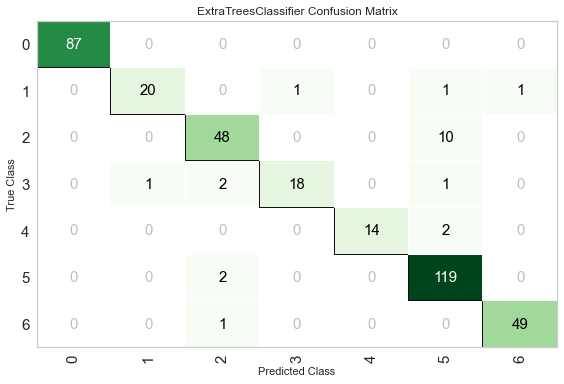

In [20]:
cl.plot_model(MODEL_CHOICE, plot='confusion_matrix')

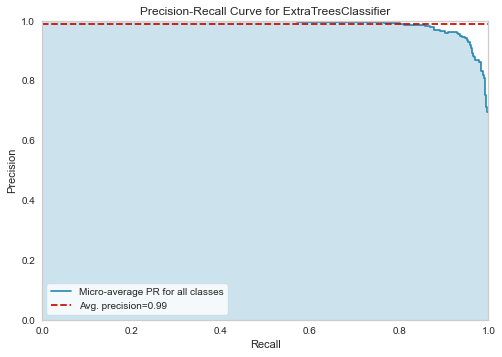

In [21]:
cl.plot_model(MODEL_CHOICE, plot='pr')

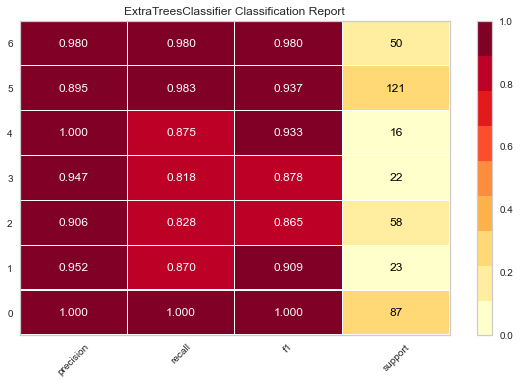

In [22]:
cl.plot_model(MODEL_CHOICE, plot='class_report')

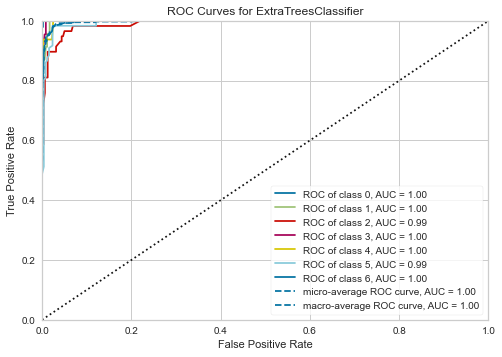

In [23]:
cl.plot_model(MODEL_CHOICE, plot='auc')

### Finalize model

In [24]:
final_model = cl.finalize_model(MODEL_CHOICE)

### Save model

In [27]:
cl.save_config('../models/2020-11-03_ET_calibrated_7class_config')

In [29]:
cl.save_model(MODEL_CHOICE, '../models/2020-11-03_ET_calibrated_7class_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='L4',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nod

### Evaluate Predictions 

In [ ]:
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(data_val['L4'], cl.predict_model(final_cb, data_val)['L4'])